# 📘 A Beginner-Friendly Guide to Similarity & Distance Measures  

Similarity and distance measures are crucial in **Machine Learning, Natural Language Processing (NLP), and Recommendation Systems**.  
They help us answer an important question:  

👉 *“How similar or different are two objects?”*  

---

## 📌 What Are Similarity Measures?  
A **similarity (or distance) measure** quantifies how close or far apart two items are.  

They are widely applied in areas such as:  
- **Text Mining** → Identifying document or sentence similarity  
- **Recommendation Systems** → Finding related users or products  
- **Clustering** → Grouping data points with shared characteristics  
- **Information Retrieval** → Ranking search results based on relevance  



## 💡 Real-World Applications  
- **📚 Text Similarity** → Comparing news articles, reviews, or chat messages  
- **🛒 Recommendations** → Suggesting similar movies, songs, or products  
- **📊 Clustering** → Grouping similar customers, documents, or patterns  
- **🔎 Search Engines** → Sorting and ranking results by closeness to a query  



## 🧮 Popular Similarity & Distance Measures  

### 1️⃣ Cosine Similarity  
Focuses on the *angle* between two vectors, ignoring magnitude:  

$$
Cosine(A, B) = \frac{A \cdot B}{\|A\|\|B\|}
$$ 

- **Range:** -1 to 1  
  - **1** → perfectly aligned (very similar)  
  - **0** → orthogonal (no similarity)  
  - **-1** → opposite directions  



### 2️⃣ Jaccard Similarity  
Compares **set overlap**:  

$$
J(A, B) = \frac{|A \cap B|}{|A \cup B|}
$$  

- **Range:** 0 to 1  
  - **1** → identical sets  
  - **0** → no overlap  



### 3️⃣ Euclidean Distance  
Measures the *straight-line distance* between two points:  

$$
d(p, q) = \sqrt{\sum_{i=1}^{n}(p_i - q_i)^2}
$$ 

✅ **Smaller values → Higher similarity**


### 4️⃣ Manhattan Distance (L1 Norm)  
Measures the *absolute differences* between coordinates:  

$$
d(p, q) = \sum_{i=1}^{n} |p_i - q_i|
$$ 

👉 Imagine moving block by block along a city grid.  



## 🧠 How Do We Use These Measures?  
1. Represent data objects (e.g., users, text, images) as **vectors or sets**  
2. Choose the **right similarity/distance metric** for your task  
3. Compute pairwise similarities/distances  
4. Apply results to tasks such as:  
   - **Ranking** → Search engines  
   - **Clustering** → Machine learning algorithms  
   - **Matching** → Recommendation engines  



## ✅ Choosing the Right Measure  

| Measure          | Best Suited For |
|------------------|-----------------|
| **Euclidean**    | Continuous, numerical data |
| **Cosine**       | Text embeddings, high-dimensional vectors |
| **Jaccard**      | Sets, categorical or binary features |
| **Manhattan**    | Grid-like or sparse data |



✨ **Takeaway:** Similarity and distance measures are the foundation of comparing, grouping, and recommending information in intelligent systems.  


# 🚀 Up Next: Real Example with Cosine Similarity  

Now that we’ve learned about Cosine Similarity, let’s apply it to **text documents** to measure how close their meanings are.  


### 📘 Measuring Text Similarity with Cosine Similarity  

Cosine similarity is one of the most popular ways to measure text similarity.  
It looks at the **angle between two vectors**, ignoring their magnitude.  

- **1.0** → very similar  
- **0.0** → no similarity  
- **-1.0** → opposite (rare in text TF-IDF)  

We’ll apply cosine similarity on a dataset of financial product descriptions,  
then use it to **detect near-duplicate pairs**.  


### 📂 Step 1: Load Dataset

In [8]:

import pandas as pd

# Load dataset
df = pd.read_csv("test.csv")

# Preview first rows
df.head()


,test_id,description_x,description_y,same_security
0,0,semtech corp,semtech corporation,NaN
1,1,vanguard mid cap index,vanguard midcap index - a,NaN
2,2,spdr gold trust gold shares,spdr gold trust spdr gold shares,NaN
3,3,vanguard total bond index adm,vanguard total bond market index,NaN
4,4,oakmark international fund class i,oakmark international cl i,NaN


### 🔎 Step 2: Vectorize Text with TF-IDF  

We’ll convert text into numeric vectors using **TF-IDF (Term Frequency – Inverse Document Frequency)**.  


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit on description_x and transform both columns
tfidf_x = vectorizer.fit_transform(df["description_x"])
tfidf_y = vectorizer.transform(df["description_y"])

# Compute cosine similarity row by row
cosine_scores = [cosine_similarity(tfidf_x[i], tfidf_y[i])[0,0] for i in range(len(df))]
df["cosine_similarity"] = cosine_scores

# Show first results
df[["description_x", "description_y", "cosine_similarity"]].head()


,description_x,description_y,cosine_similarity
0,semtech corp,semtech corporation,0.673422
1,vanguard mid cap index,vanguard midcap index - a,0.307456
2,spdr gold trust gold shares,spdr gold trust spdr gold shares,0.958085
3,vanguard total bond index adm,vanguard total bond market index,0.715294
4,oakmark international fund class i,oakmark international cl i,0.758911


### 📊 Step 3: Distribution of Cosine Similarities  

Let’s visualize how similarity scores are distributed across the dataset.  


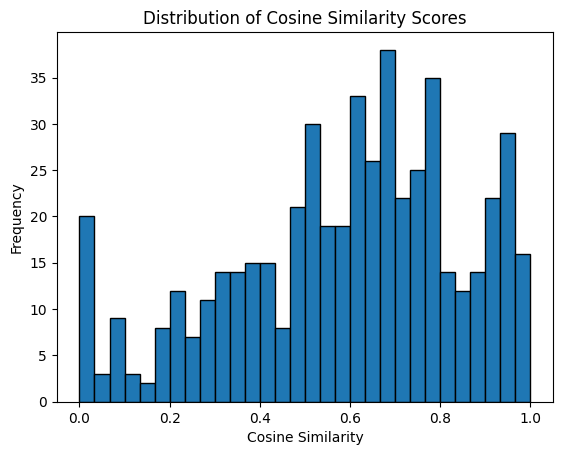

In [10]:
import matplotlib.pyplot as plt

plt.hist(df["cosine_similarity"], bins=30, edgecolor="black")
plt.title("Distribution of Cosine Similarity Scores")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.show()


### 🏆 Step 4: Most Similar Pairs  

Let’s find the **top 5 most similar text pairs**.  


In [11]:
# Sort descending by similarity
most_similar = df.sort_values(by="cosine_similarity", ascending=False).head(5)
most_similar[["description_x", "description_y", "cosine_similarity"]]


,description_x,description_y,cosine_similarity
394,kimberly-clark corp,kimberly-clark corp.,1.0
299,citrix systems inc.,citrix systems inc,1.0
313,nxp semiconductors f,nxp semiconductors n v,1.0
126,vanguard mid-cap value etf,vanguard mid cap value etf,1.0
367,the growth fund of america,the growth fund of america-529a (1005),1.0


### ❌ Step 5: Least Similar Pairs  

Let’s find the **bottom 5 least similar text pairs**.  


In [12]:
# Sort ascending by similarity
least_similar = df.sort_values(by="cosine_similarity", ascending=True).head(5)
least_similar[["description_x", "description_y", "cosine_similarity"]]


,description_x,description_y,cosine_similarity
22,vanguard total bond market idx-adm,vang tot bd mk is pl,0.0
37,vanguard intermediate-term treasury fund admir...,vang intm treas adm,0.0
51,oppenhmr develpng mkts y,oppenheimer developing markets cl y,0.0
477,vang tot bd mkt adm,vanguard ttl bnd mrk indx inst,0.0
416,vang tot bd mkt adm,vanguard total bond market index,0.0


### ⚖️ Step 6: Thresholding for Duplicate Detection  

We’ll define a threshold:  

- **cosine ≥ 0.8** → "Similar" (likely duplicate)  
- **cosine < 0.8** → "Not Similar"  


In [13]:
# Apply threshold
threshold = 0.8
df["similar_flag"] = df["cosine_similarity"].apply(lambda x: "Similar" if x >= threshold else "Not Similar")

# Show a sample
df[["description_x", "description_y", "cosine_similarity", "similar_flag"]].head(10)

,description_x,description_y,cosine_similarity,similar_flag
0,semtech corp,semtech corporation,0.673422,Not Similar
1,vanguard mid cap index,vanguard midcap index - a,0.307456,Not Similar
2,spdr gold trust gold shares,spdr gold trust spdr gold shares,0.958085,Similar
3,vanguard total bond index adm,vanguard total bond market index,0.715294,Not Similar
4,oakmark international fund class i,oakmark international cl i,0.758911,Not Similar
5,pfizer inc div: 1.200,pfizer inc com,0.615887,Not Similar
6,spartan global ex us index fid adv cl,sptn glb xus idx adv,0.172325,Not Similar
7,vanguard total bond market idx-adm,vanguard total bond market index fund investor...,0.505327,Not Similar
8,banco latinoamericano de exportacio class e co...,banco latinoamericano come-e,0.565877,Not Similar
9,baidu inc fadr 1 adr reps 0.1 ord shs,baidu inc spons ads repr 0.10 ord cls a us0.00005,0.277191,Not Similar


### 📊 Step 7: Summary of Results  

Let’s count how many pairs were flagged as **Similar vs Not Similar**.  


In [14]:
summary_counts = df["similar_flag"].value_counts()
summary_counts


similar_flag
Not Similar    409
Similar        107
Name: count, dtype: int64

### 💾 Step 8: Export Results  

We’ll save the dataframe (with cosine scores + flags) into a new CSV for further analysis.  


In [ ]:
# Save to CSV
output_path = "similarity_results.csv"
df.to_csv(output_path, index=False)

output_path

'similarity_results.csv'

## ✅ Final Takeaways  

- **Cosine similarity** is a powerful way to compare text.  
- The **distribution plot** shows overall similarity across the dataset.  
- **Top/least pairs** help inspect edge cases.  
- A **threshold** makes the method practical for:  
  - Duplicate detection  
  - Record linkage  
  - Cleaning product databases  
- Exporting results gives a **ready-to-use file** with similarity scores and labels.  
